## **PHASE 4: MODEL TRAINING (20 minutes)**

### **Requirements:**

**4.1 Feature Scaling**
- Create StandardScaler
- Fit scaler on X_train only
- Transform X_train using fitted scaler
- Transform X_test using same scaler (do not fit again!)
- Verify scaled data has mean ~0 and std ~1

**4.2 Model Training**
- Create Logistic Regression model with:
  - class_weight='balanced' (handles imbalanced data)
  - random_state=42
  - max_iter=1000
- Train model on scaled training data
- Display confirmation that training completed

**4.3 Generate Predictions**
- Predict on scaled test set (binary predictions: 0 or 1)
- Get probability predictions on scaled test set (probabilities: 0.0 to 1.0)
- Display first 10 predictions alongside actual values
- Display first 10 probability predictions

**Deliverable:**
- Trained model object
- Test set predictions (binary)
- Test set probabilities

---

(30000, 24)
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                     

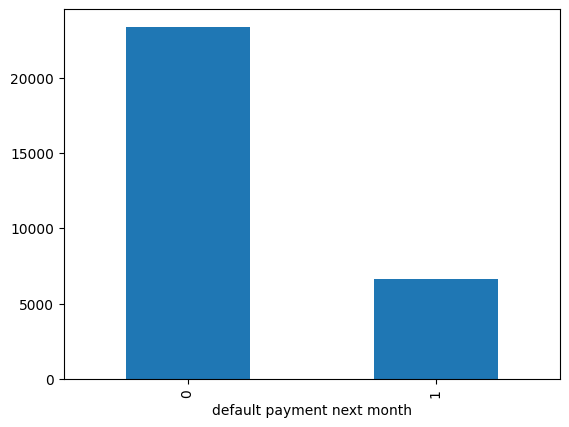

default payment next month
True    True
Name: count, dtype: bool
Missing values remaining: 0
<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 1 to 30000
Series name: default payment next month
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB
None
(24000, 12)
(6000, 12)
(24000,)
(6000,)

Default Rate (Train): 0.2212
Default Rate (Test):  0.2212
(24000, 12)
(6000, 12)
(24000,)
(6000,)

Default Rate (Train): 0.2212
Default Rate (Test):  0.2212


/Users/garimajaiswal/Learning/AI-ML/ai-ml-learning-journey/.venv/lib/python3.14/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/var/folders/2s/x8m_y47566sf21659r0nw6s40000gn/T/ipykernel_87594/1085564212.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


In [16]:
import pandas as pd
from pandas import value_counts

# execute all the cells in the phase 2 notebook and make the variables available here
%run ./phase3_data_preparation.ipynb

if False:
    original_data = pd.DataFrame()
    X_train = pd.DataFrame()
    X_test = pd.DataFrame()
    y_train = pd.DataFrame()
    y_test = pd.DataFrame()

# After the command finishes, all the variables from that notebook,
# like the 'original_data' DataFrame, will be available here.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(f"\nDefault Rate (Train): {y_train.mean():.4f}")
print(f"Default Rate (Test):  {y_test.mean():.4f}")

**4.1 Feature Scaling**
- Create StandardScaler
- Fit scaler on X_train only
- Transform X_train using fitted scaler
- Transform X_test using same scaler (do not fit again!)
- Verify scaled data has mean ~0 and std ~1

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train,copy=True)
# print(X_train_scaled)

X_test_scaled = scaler.transform(X_test, copy=True)
# print(X_test_scaled)

print(X_train_scaled.mean())
print(X_test_scaled.mean())

-2.0378760407563984e-17
0.0025179358450981206


**4.2 Model Training**
- Create Logistic Regression model with:
  - class_weight='balanced' (handles imbalanced data)
  - random_state=42
  - max_iter=1000
- Train model on scaled training data
- Display confirmation that training completed


In [18]:
mod = LogisticRegression(class_weight='balanced',random_state=42,max_iter=1000)
mod.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


**4.3 Generate Predictions**
- Predict on scaled test set (binary predictions: 0 or 1)
- Get probability predictions on scaled test set (probabilities: 0.0 to 1.0)
- Display first 10 predictions alongside actual values
- Display first 10 probability predictions



In [23]:
predictions = mod.predict(X_test_scaled)
print(y_test.head(10))
print(predictions[:10])

prob_predictions = mod.predict_proba(X_test_scaled)
print(prob_predictions[:10,1])


6908     0
24576    0
26767    0
2157     1
3180     0
29383    0
24455    0
23887    0
5505     0
29721    0
Name: default payment next month, dtype: int64
[0 0 0 0 0 1 0 0 0 0]
[0.31918037 0.35932168 0.37611202 0.29442527 0.20391145 0.64208208
 0.32695726 0.26722283 0.24498706 0.33521054]


**Deliverable:**
- Trained model object
- Test set predictions (binary)
- Test set probabilities
